<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Exploratory%20Data%20Analysis/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [70]:
# Ensure the data directory exists
if not os.path.exists('data'):
    os.makedirs('data')

# List of raw-GitHub URLs to download
urls = [
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_books.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_unemployment.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/divorce.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries_clean.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/planes.csv",
]

# Run wget in quiet mode for each URL
for url in urls:
    # -q suppresses all output; -P directs output into 'data/' directory
    !wget -q -P data/ "{url}"

# Single success message
print("All files downloaded successfully.")


All files downloaded successfully.


## Getting to Know a Dataset
What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical data and create Seaborn visualizations to communicate your findings.




In [71]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


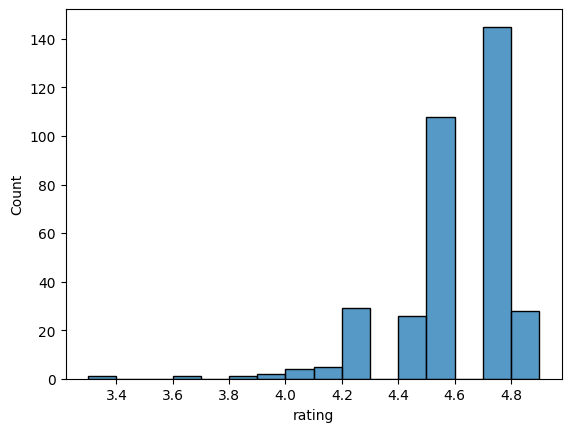

In [72]:
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()

In [73]:
books.groupby("genre").mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [74]:
books.select_dtypes(include=np.number).agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [75]:
books.select_dtypes(include=np.number).agg({"rating": ["mean", "std"], "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [76]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Summaries with .groupby() and .agg()
In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [77]:
unemployment = pd.read_csv("data/clean_unemployment.csv")

In [78]:
# Print yearly mean and standard deviation grouped by continent
display(unemployment.select_dtypes(include=np.number).agg(["mean", "std"]))

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [79]:
# Print yearly mean and standard deviation grouped by continent
year_cols = [col for col in unemployment.columns if col.isdigit()]
display(unemployment.groupby("continent")[year_cols].agg(["mean", "std"]))


2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

### Named aggregations
You've seen how `.groupby()` and `.agg()` can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called `continent_summary` which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [80]:

continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "mean")
)
display(continent_summary)

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,10.473585
Asia,6.906170,6.906170
Europe,7.414872,7.414872
North America,9.155000,9.155000
Oceania,4.280000,4.280000
South America,9.924167,9.924167


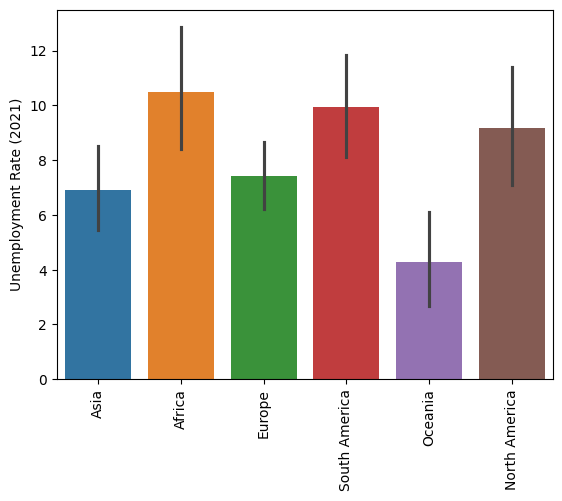

In [81]:
# Create a bar plot of continents and their average unemployment
fig, ax = plt.subplots()
sns.barplot(x="continent", y="2021", data=unemployment, hue="continent", legend=False)
ax.set_xlabel("") # Set the x-label to an empty string
ax.set_ylabel("Unemployment Rate (2021)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Data Cleaning and Imputation
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!



In [82]:
planes = pd.read_csv("data/planes.csv")

### Dealing with missing data
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [83]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [84]:
# Count the number of missing values in each column
display(planes.isna().sum())

,0
Airline,427
Date_of_Journey,322
Source,187
Destination,347
Route,256
Dep_Time,260
Arrival_Time,194
Duration,214
Total_Stops,212
Additional_Info,589


In [85]:
# Find the five percent threshold
threshold = len(planes) * 0.05
display(threshold)

533.0

In [86]:
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
display(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [87]:
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

In [88]:
# Check how many missing values remain in each column
display(planes.isna().sum())

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,300


### Strategies for remaining missing data
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the `"Additional_Info"` and `"Price"` columns, which are missing 300 and 368 values respectively.

You'll first take a look at what `"Additional_Info"` contains, then visualize the price of plane tickets by different airlines.

In [89]:
display(planes["Additional_Info"].value_counts())

,count
Additional_Info,
No info,6399
In-flight meal not included,1525
No check-in baggage included,258
1 Long layover,14
Change airports,7
No Info,2
Business class,1
Red-eye flight,1
2 Long layover,1


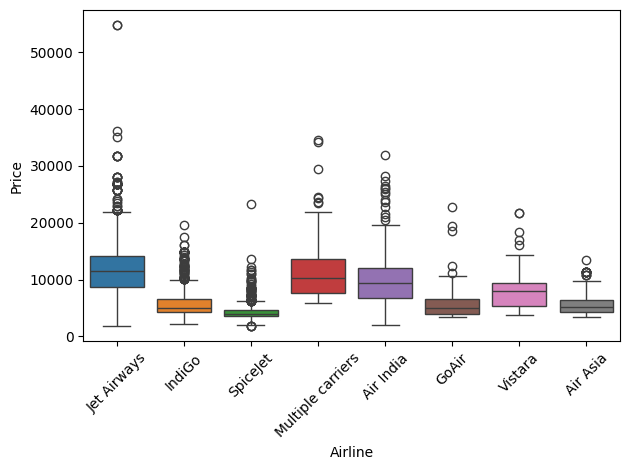

In [90]:
# Create a box plot of Price by Airline
fig, ax = plt.subplots()

sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline")
# Rotate x-axis labels using ax.tick_params
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#### Question
How should you deal with the missing values in `"Additional_Info"` and `"Price"`?

**Possible Answers**

1) Remove the `"Additional_Info"` column and impute the mean for missing values of `"Price"`.

2) Remove "No info" values from `"Additional_Info"` and impute the median for missing values of `"Price"`.

3) Remove the "Additional_Info" column and impute the mean by `"Airline"` for missing values of `"Price"`.

4) Remove the "Additional_Info" column and impute the median by `"Airline"` for missing values of `"Price"`.

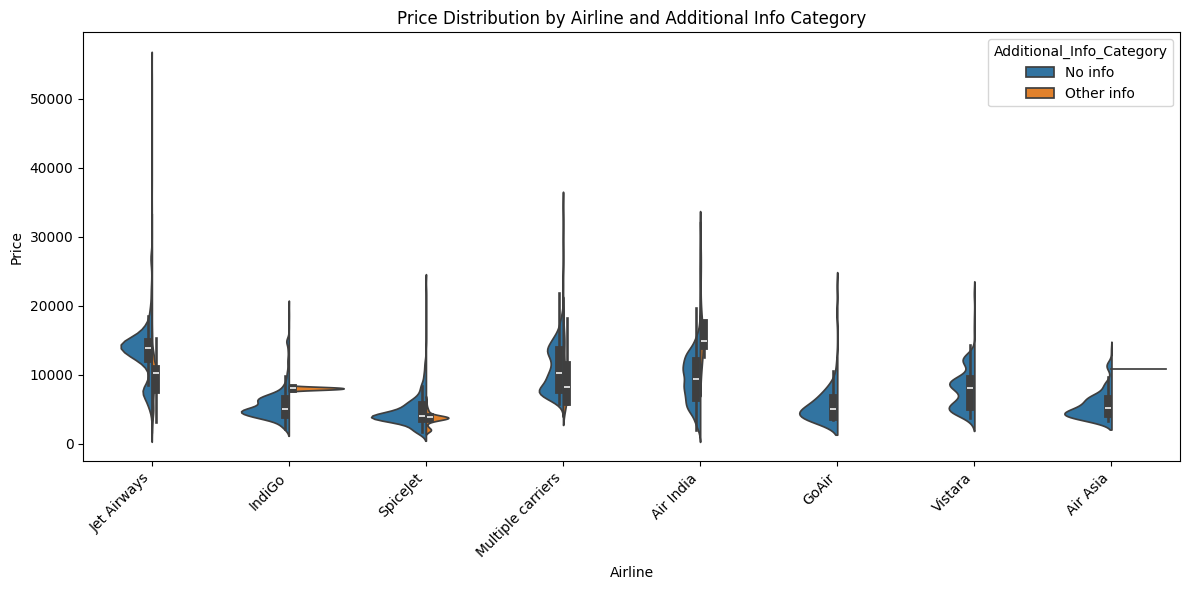

In [91]:
# Categorize 'Additional_Info' into 'No info' and 'Other info'
planes['Additional_Info_Category'] = planes['Additional_Info'].apply(lambda x: 'No info' if pd.isna(x) or x == 'No info' else 'Other info')

# Create a violin plot of Price by Airline, split by Additional_Info_Category
plt.figure(figsize=(12, 6))
sns.violinplot(data=planes, x='Airline', y='Price', hue='Additional_Info_Category', split=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Airline and Additional Info Category')
plt.tight_layout()
plt.show()

### Imputing missing plane prices
Now there's just one column with missing values left!

You've removed the `"Additional_Info"` column from planes—the last step is to impute the missing data in the `"Price"` column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the `"Airline"` is a solid approach!

In [92]:
planes.dropna(subset="Additional_Info", inplace=True)

In [93]:
# Calculate median plane ticket prices by Airline after dropping rows with missing 'Additional_Info'
airline_prices = planes.groupby("Airline")["Price"].median()
display(airline_prices)

,Price
Airline,
Air Asia,5177.0
Air India,9443.0
GoAir,4959.0
IndiGo,5054.0
Jet Airways,11507.0
Multiple carriers,10010.0
SpiceJet,3873.0
Vistara,8085.0


In [94]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
display(prices_dict)

{'Air Asia': 5177.0,
 'Air India': 9443.0,
 'GoAir': 4959.0,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10010.0,
 'SpiceJet': 3873.0,
 'Vistara': 8085.0}

In [96]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
display(planes.isna().sum())

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0
